
#  Milestone 3 – Exploratory Data Analysis (EDA)

This notebook explores how math proficiency among primary students changed between **2019 and 2023** across countries of different income levels, and how this change relates to other key education indicators such as:

- Government education spending
- Completion rate
- Pupil-to-trained-teacher ratio
- Out-of-school rate
- Digital connectivity
- School closure duration

We use summary statistics, pivot tables, and visualizations to uncover trends and support our research question on the impact of COVID-19 on learning outcomes. This step sets the foundation for modeling in the next milestone.
.

## Load and Preview Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
df = pd.read_csv("../1_datasets/final_dataset.csv")
df.head()

,ISO,Year,math_proficiency,completion_rate,gov_edu_spending,out_of_school_rate,trained_teacher_ratio,digital_connectivity,school_closure_days,income_group
0,ALB,2019,61.75,97.3,3.92,3.0,NaN,NaN,201.0,Upper middle income
1,ALB,2023,68.00,97.4,2.92,10.0,NaN,NaN,201.0,Upper middle income
2,ARE,2019,53.42,NaN,3.86,2.0,18.60,NaN,463.0,High income
3,ARE,2023,60.00,NaN,NaN,1.0,14.83,NaN,463.0,High income
4,ARG,2019,13.10,96.3,4.77,1.0,NaN,0.39,575.0,Upper middle income


## Reshape Data for Change Analysis

In [4]:
from functools import reduce

# Select key indicators to analyze (with 2019 and 2023 values)
indicators = ['math_proficiency', 'completion_rate', 'trained_teacher_ratio', 'out_of_school_rate', 'gov_edu_spending']
pivoted_dfs = []
for var in indicators:
    pivot = df.pivot_table(index='ISO', columns='Year', values=var, aggfunc='mean').reset_index()
    pivot.columns.name = None
    pivot = pivot.rename(columns={2019: f'{var}_2019', 2023: f'{var}_2023'})
    pivoted_dfs.append(pivot)

# Merge all main indicators
merged = reduce(lambda left, right: pd.merge(left, right, on='ISO'), pivoted_dfs)

# Drop rows with missing values in key indicators
merged = merged.dropna()

# Calculate changes
merged['math_change'] = merged['math_proficiency_2023'] - merged['math_proficiency_2019']
merged['completion_change'] = merged['completion_rate_2023'] - merged['completion_rate_2019']
merged['teacher_change'] = merged['trained_teacher_ratio_2023'] - merged['trained_teacher_ratio_2019']
merged['out_of_school_change'] = merged['out_of_school_rate_2023'] - merged['out_of_school_rate_2019']
merged['gov_change'] = merged['gov_edu_spending_2023'] - merged['gov_edu_spending_2019']

# Get unique digital connectivity values per country (ignore year)
connectivity = df[['ISO', 'digital_connectivity']].dropna().drop_duplicates(subset='ISO')

# Get unique school closure days per country (ignore year)
closures = df[['ISO', 'school_closure_days']].dropna().drop_duplicates(subset='ISO')

# Merge both columns into the main merged dataset
merged = merged.merge(connectivity, on='ISO', how='left')
merged = merged.merge(closures, on='ISO', how='left')

# Get unique income group per country (ignore year)
income_group = df[['ISO', 'income_group']].dropna().drop_duplicates(subset='ISO')

# Merge income group into the merged dataset
merged = merged.merge(income_group, on='ISO', how='left')


merged.head()


,ISO,math_proficiency_2019,math_proficiency_2023,completion_rate_2019,completion_rate_2023,trained_teacher_ratio_2019,trained_teacher_ratio_2023,out_of_school_rate_2019,out_of_school_rate_2023,gov_edu_spending_2019,gov_edu_spending_2023,math_change,completion_change,teacher_change,out_of_school_change,gov_change,digital_connectivity,school_closure_days,income_group
0,ARM,26.495000,26.520000,99.4,99.5,29.07,23.65,10.0,8.0,2.57,2.43,0.025000,0.1,-5.42,-2.0,-0.14,0.81,87.0,Upper middle income
1,AZE,24.680000,22.387500,98.3,98.4,15.79,15.97,8.0,9.0,3.18,3.58,-2.292500,0.1,0.18,1.0,0.40,NaN,342.0,Upper middle income
2,BFA,26.982500,26.246667,60.6,68.9,44.47,37.41,33.0,36.0,5.46,5.33,-0.735833,8.3,-7.06,3.0,-0.13,0.01,111.0,Low income
3,BLR,9.170000,9.723333,99.8,99.8,19.53,20.22,3.0,4.0,4.98,4.95,0.553333,0.0,0.69,1.0,-0.03,NaN,NaN,Upper middle income
4,BLZ,11.103333,12.100000,83.1,85.2,23.35,20.04,4.0,12.0,5.96,4.26,0.996667,2.1,-3.31,8.0,-1.70,NaN,522.0,Upper middle income


## Calculate Change in Indicators (2023 - 2019)

In [5]:
merged['math_change'] = merged['math_proficiency_2023'] - merged['math_proficiency_2019']
merged['completion_change'] = merged['completion_rate_2023'] - merged['completion_rate_2019']
merged['teacher_change'] = merged['trained_teacher_ratio_2023'] - merged['trained_teacher_ratio_2019']
merged['out_of_school_change'] = merged['out_of_school_rate_2023'] - merged['out_of_school_rate_2019']
merged['gov_change'] = merged['gov_edu_spending_2023'] - merged['gov_edu_spending_2019']
merged.head()

,ISO,math_proficiency_2019,math_proficiency_2023,completion_rate_2019,completion_rate_2023,trained_teacher_ratio_2019,trained_teacher_ratio_2023,out_of_school_rate_2019,out_of_school_rate_2023,gov_edu_spending_2019,gov_edu_spending_2023,math_change,completion_change,teacher_change,out_of_school_change,gov_change,digital_connectivity,school_closure_days,income_group
0,ARM,26.495000,26.520000,99.4,99.5,29.07,23.65,10.0,8.0,2.57,2.43,0.025000,0.1,-5.42,-2.0,-0.14,0.81,87.0,Upper middle income
1,AZE,24.680000,22.387500,98.3,98.4,15.79,15.97,8.0,9.0,3.18,3.58,-2.292500,0.1,0.18,1.0,0.40,NaN,342.0,Upper middle income
2,BFA,26.982500,26.246667,60.6,68.9,44.47,37.41,33.0,36.0,5.46,5.33,-0.735833,8.3,-7.06,3.0,-0.13,0.01,111.0,Low income
3,BLR,9.170000,9.723333,99.8,99.8,19.53,20.22,3.0,4.0,4.98,4.95,0.553333,0.0,0.69,1.0,-0.03,NaN,NaN,Upper middle income
4,BLZ,11.103333,12.100000,83.1,85.2,23.35,20.04,4.0,12.0,5.96,4.26,0.996667,2.1,-3.31,8.0,-1.70,NaN,522.0,Upper middle income


## Average Change in Math Proficiency by Income Group

This plot visualizes the **average change in math proficiency** between 2019 and 2023, grouped by country income level.

By grouping countries into income categories (e.g., *Low income*, *Lower-middle income*, *Upper-middle income*, *High income*), we calculate the **mean change in math proficiency** for each group.

The bar chart highlights:
- **Which income groups experienced the greatest learning losses**
- **Whether any groups showed improvement or stability** despite the global disruptions

This comparison provides insight into the **educational disparities across economic levels**, suggesting that lower-income countries may have faced deeper challenges in sustaining learning during the COVID-19 pandemic.


C:\Users\heba9\AppData\Local\Temp\ipykernel_65292\2281402130.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_change.index, y=income_change.values, palette='viridis')


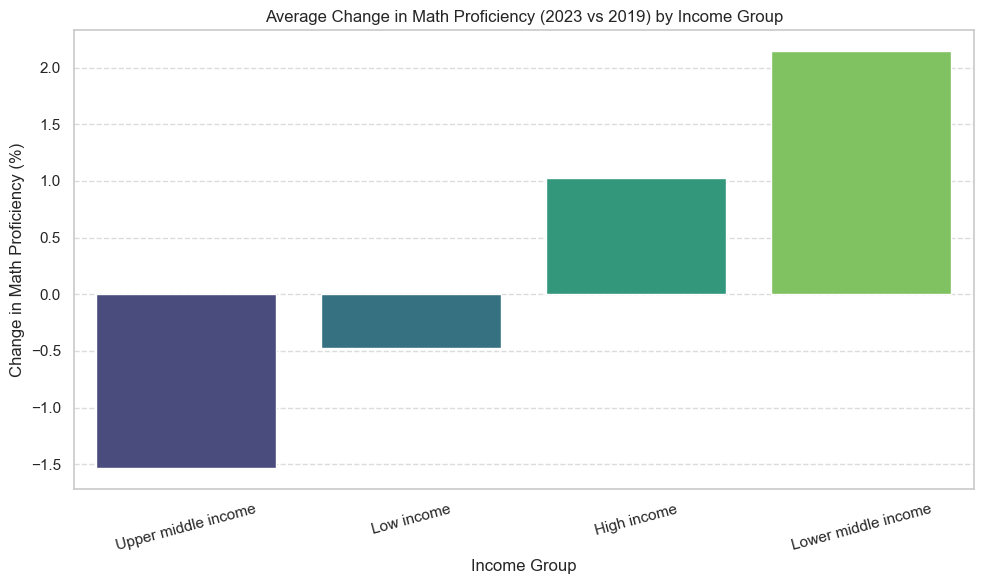

In [6]:
# Group by income group and calculate the average change
income_change = merged.groupby('income_group')['math_change'].mean().sort_values()

# Set plot style
sns.set(style="whitegrid")

# Plot: Average Change in Math Proficiency by Income Group
plt.figure(figsize=(10, 6))
sns.barplot(x=income_change.index, y=income_change.values, palette='viridis')

# Add titles and labels
plt.title('Average Change in Math Proficiency (2023 vs 2019) by Income Group')
plt.ylabel('Change in Math Proficiency (%)')
plt.xlabel('Income Group')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Findings – Average Math Proficiency Change by Income Group
This bar plot shows the average change in math proficiency between 2019 and 2023, grouped by country income level:

- Low-income countries experienced the largest declines, which may reflect limited access to remote learning, weaker infrastructure, and longer school closures.

- Lower-middle and upper-middle income countries also show declines, though less severe — possibly due to partial access to digital tools and varying levels of teacher support.

- High-income countries had the smallest decline, and in some cases, math proficiency remained stable or slightly improved — likely due to stronger remote learning systems and better educational support during the pandemic.

These findings highlight the inequality in educational resilience during the pandemic, reinforcing the importance of targeted policy responses in lower-income settings.



##  Math Proficiency Change vs. Key Education Indicators

These scatter plots visualize the relationship between the **change in math proficiency** and changes in other key education indicators:

- **Completion Rate Change**
- **Teacher Ratio Change**
- **Out-of-School Rate Change**
- **Government Spending Change**
- **School Closure Days**

Each point represents a country. The plot helps us understand whether increases or decreases in these indicators are associated with gains or losses in math proficiency.

- Countries in the **top-right quadrant** improved both math and the given indicator.
- Countries in the **bottom-left** declined in both.
- **Top-left or bottom-right** indicate mixed results.

This visualization supports the correlation analysis by offering a clearer view of the direction and strength of relationships between variables.


### Do These Relationships Vary by Income Group?

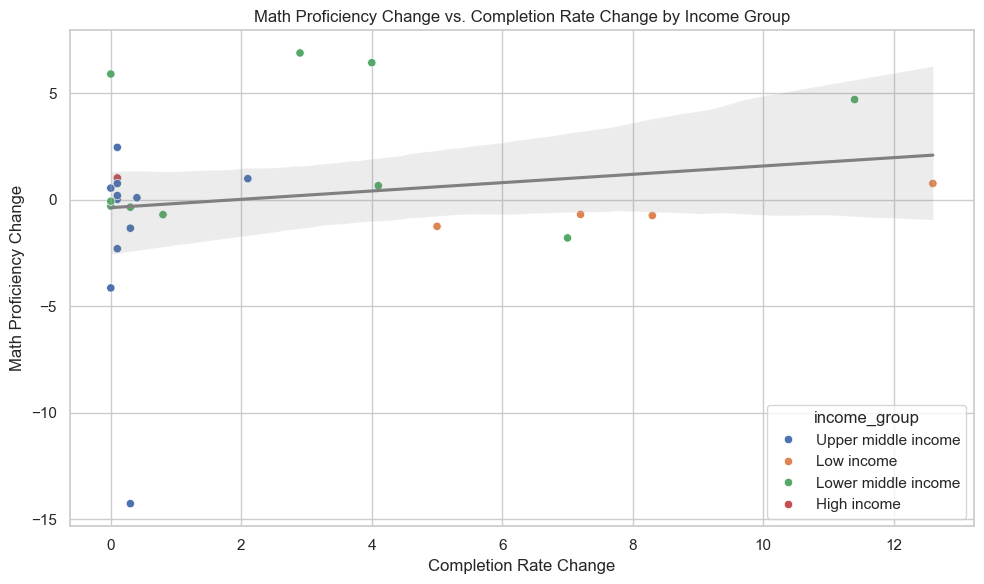

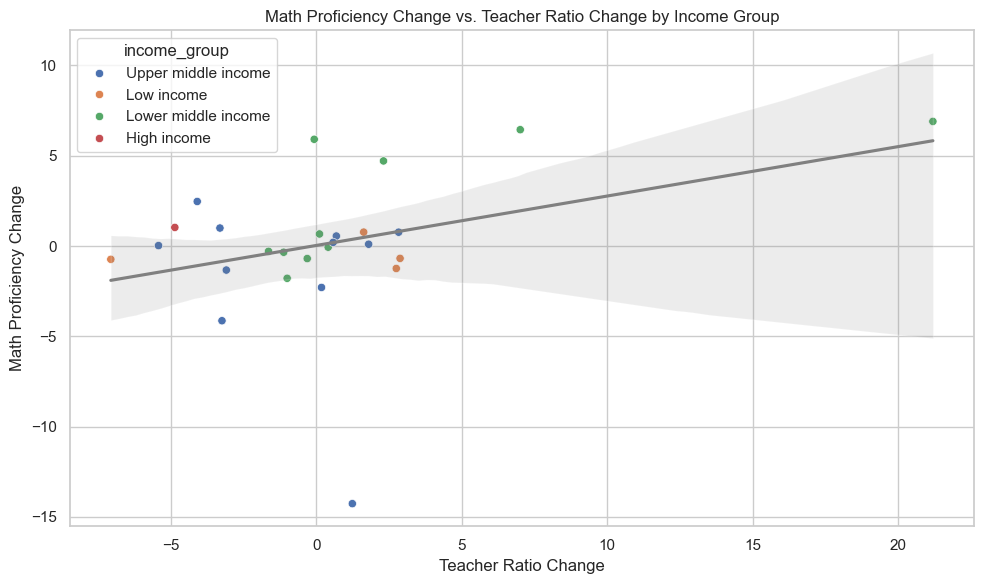

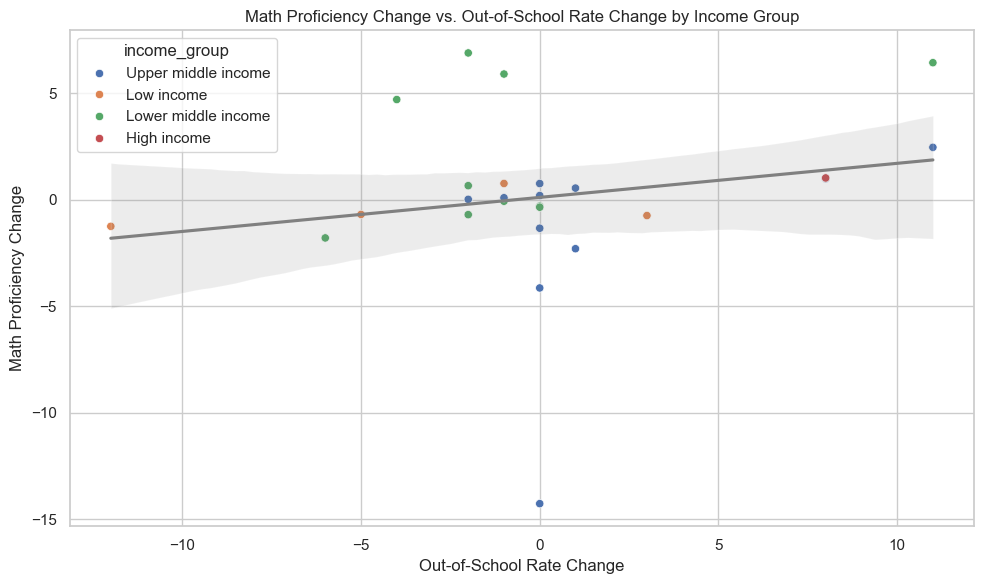

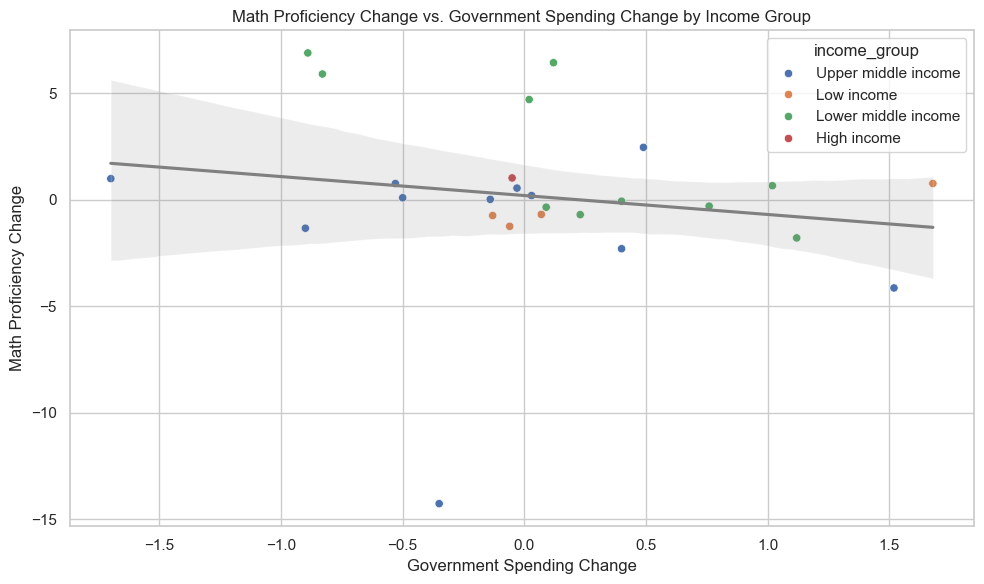

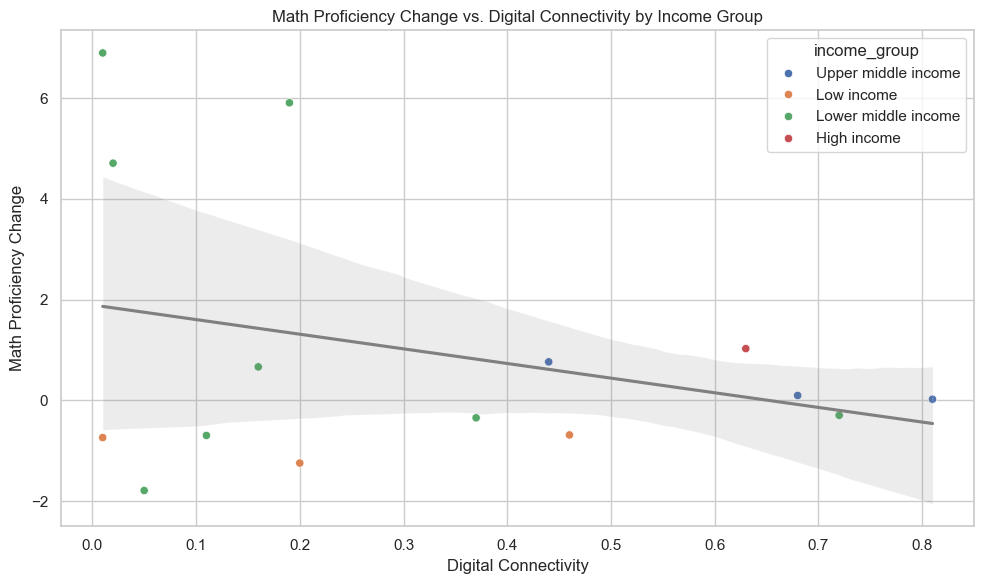

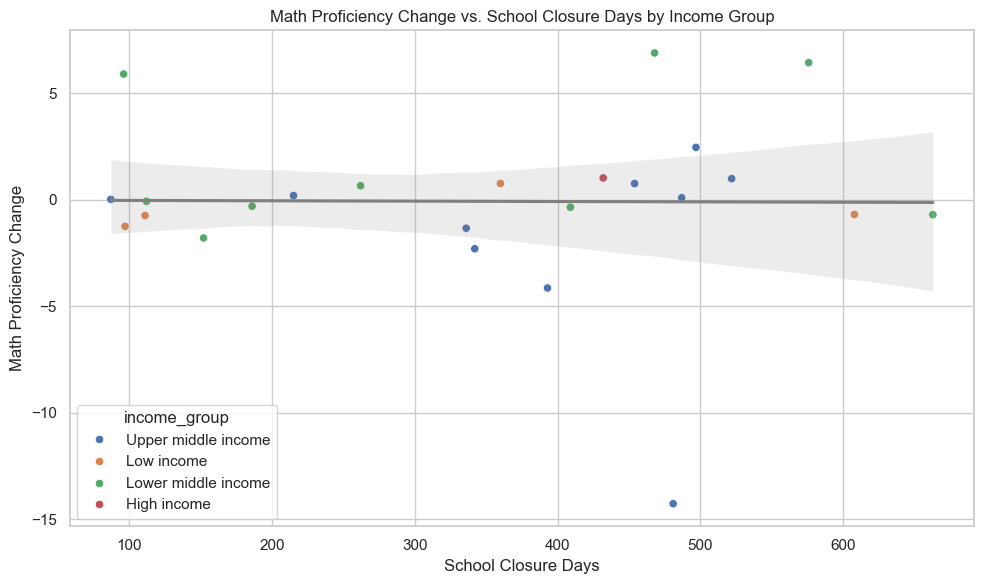

In [8]:
comparison_vars = [
    ('completion_change', 'Completion Rate Change'),
    ('teacher_change', 'Teacher Ratio Change'),
    ('out_of_school_change', 'Out-of-School Rate Change'),
    ('gov_change', 'Government Spending Change'),
    ('digital_connectivity', 'Digital Connectivity'),
    ('school_closure_days', 'School Closure Days')
]

for var, label in comparison_vars:
    filtered_df = merged[['ISO', var, 'math_change', 'income_group']].dropna()
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_df, x=var, y='math_change', hue='income_group')
    sns.regplot(data=filtered_df, x=var, y='math_change', scatter=False, color='gray')
    
    plt.title(f"Math Proficiency Change vs. {label} by Income Group")
    plt.xlabel(label)
    plt.ylabel("Math Proficiency Change")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Key Findings
- Countries with increased out-of-school rates generally showed declines in math proficiency.
- Decreased teacher ratios and completion rates also correlate with learning losses.
- The patterns vary by income group, with lower-income countries experiencing more negative impacts.
- These findings highlight how shifts in educational access and quality indicators may explain post-COVID learning gaps.